In [1]:
import unclip 
import matplotlib.pyplot as plt
import torch
%load_ext autoreload 
%autoreload 2

In [2]:
uc = unclip.UnClip()


Couldn't connect to the Hub: (MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /api/models/kakaobrain/karlo-v1-alpha (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7fedebba35f0>: Failed to resolve \'huggingface.co\' ([Errno -2] Name or service not known)"))'), '(Request ID: 7827b91a-7b98-4576-a92c-9a183294209c)').
Will try to load from local cache.


Loading pipeline components...:   0%|          | 0/10 [00:00<?, ?it/s]

In [18]:

with torch.no_grad():
    emb, hidden = uc.text2emb("a high-resolution photograph of a big red plane on a green leaf.")

torch.Size([1, 768]) torch.Size([2, 81, 1536]) torch.Size([2, 1280]) torch.Size([2, 77])


In [ ]:
with torch.no_grad():
    img = uc.emb2img(emb, hidden)

plt.imshow(img[0].cpu().numpy().transpose(1,2,0)*0.5+0.5)

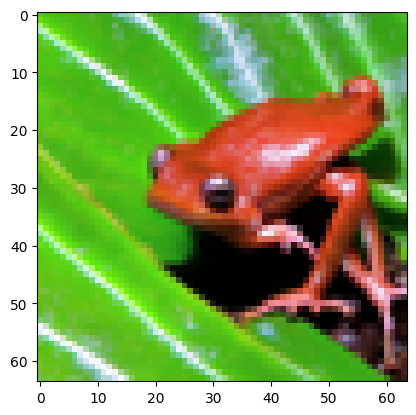

In [17]:
hidden1, hidden2, hidden3 = hidden
zero_hidden = (hidden1, hidden2, hidden3)
with torch.no_grad():
    img2 = uc.emb2img(emb, zero_hidden)

plt.imshow(img2[0].cpu().numpy().transpose(1,2,0)*0.5+0.5)

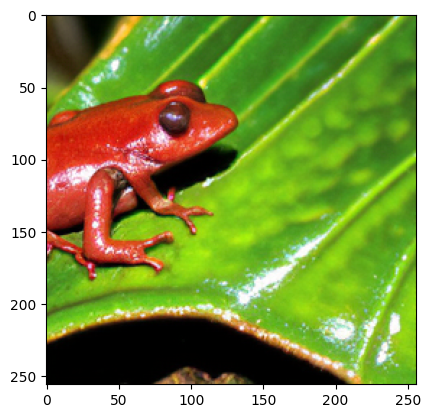

In [12]:
with torch.no_grad():
    big_imge = uc.sr(img)

plt.imshow(big_imge[0].cpu().numpy().transpose(1,2,0)*0.5+0.5)